Question 6

Experiment with the number of clusters in K-Means using the Elbow Method and Silhouette Scores over iris data set and explain the results.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

# Now proceed with your K-Means or other code


In [3]:
df=pd.read_csv(r"D:\OneDrive\Desktop\ML_PRAC\ML_PRAC\Iris.csv")

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
x=df.iloc[:,1:-1]
le=LabelEncoder()
y=le.fit_transform(df.iloc[:,-1])

In [9]:
x.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [10]:
y[:2]

array([0, 0])

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [13]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((120, 4), (120,), (30, 4), (30,))

In [14]:
from sklearn.cluster import KMeans

In [15]:
error={}
for i in  range(1,6):
    km=KMeans(n_clusters=i)
    km.fit(x_train)
    error[i]=km.inertia_

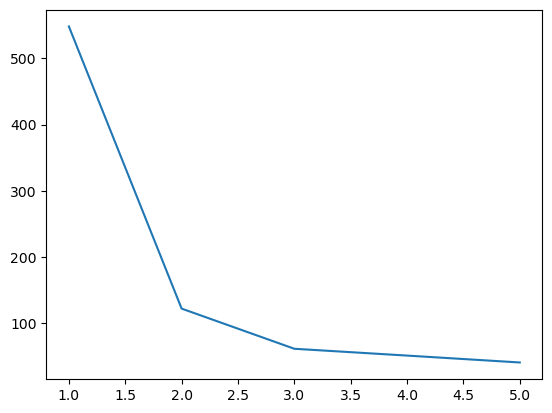

In [16]:
plt.plot(error.keys(),error.values())

we cancheck that at clluster 3 the error dimishes hence 3 clusters is sufficient

In [17]:
km=KMeans(n_clusters=3)
km.fit(x_train,y_train)

KMeans(n_clusters=3)

In [18]:
y_pred=km.predict(x_test)

In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8666666666666667

In [20]:
from sklearn.metrics import silhouette_score

In [22]:
silhouette_score(x_test,y_pred)

0.4851501109123085